<a href="https://colab.research.google.com/github/majorquev/DBDC_202304_Programacion_en_R_para_ciencia_de_datos/blob/main/Clases/C6/Clase6_2_reglas_de_asociacion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Parte 4: Reglas de asociación


**Autor:** Miguel Jorquera Viguera<br>
**E-mail:** majorquev@gmail.com<br>
**Ayudante:** Rodrigo Morales<br>
**E-mail ayudante:** rumorale1@gmail.com

Las reglas de asociación nos permiten identificar relaciones entre variables a través de grandes datasets. Es posible cuantificar que tan "fuerte" es la relación obtenida mediante diversas métricas de interés, entre las cuales se destacan el _lift_, _support_ y _confidence_ de una regla.

Para más detalles sobre la definición y algoritmo de generación de las reglas refiérase a la presentación de la clase 7 de este curso.




In [2]:
install.packages("arules")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [4]:
library(arules)
library(dplyr)
data(Groceries)
class(Groceries)

inspect(head(Groceries, 6))

[1] "transactions"
attr(,"package")
[1] "arules"

    items                     
[1] {citrus fruit,            
     semi-finished bread,     
     margarine,               
     ready soups}             
[2] {tropical fruit,          
     yogurt,                  
     coffee}                  
[3] {whole milk}              
[4] {pip fruit,               
     yogurt,                  
     cream cheese ,           
     meat spreads}            
[5] {other vegetables,        
     whole milk,              
     condensed milk,          
     long life bakery product}
[6] {whole milk,              
     butter,                  
     yogurt,                  
     rice,                    
     abrasive cleaner}        


In [5]:
Groceries

transactions in sparse format with
 9835 transactions (rows) and
 169 items (columns)

In [ ]:
?transactions

In [6]:
 # Numero de items por observación mediante comndo size
size(head(Groceries,6))

[1] 4 3 1 4 4 5

In [7]:
 #LIST convierte las trasacciones a una lista (con mayusculas)
lista <- LIST(head(Groceries,6))

In [8]:
lista
class(lista)
str(lista)

[[1]]
[1] "citrus fruit"        "semi-finished bread" "margarine"          
[4] "ready soups"        

[[2]]
[1] "tropical fruit" "yogurt"         "coffee"        

[[3]]
[1] "whole milk"

[[4]]
[1] "pip fruit"     "yogurt"        "cream cheese " "meat spreads" 

[[5]]
[1] "other vegetables"         "whole milk"              
[3] "condensed milk"           "long life bakery product"

[[6]]
[1] "whole milk"       "butter"           "yogurt"           "rice"            
[5] "abrasive cleaner"

[1] "list"

List of 6
 $ : chr [1:4] "citrus fruit" "semi-finished bread" "margarine" "ready soups"
 $ : chr [1:3] "tropical fruit" "yogurt" "coffee"
 $ : chr "whole milk"
 $ : chr [1:4] "pip fruit" "yogurt" "cream cheese " "meat spreads"
 $ : chr [1:4] "other vegetables" "whole milk" "condensed milk" "long life bakery product"
 $ : chr [1:5] "whole milk" "butter" "yogurt" "rice" ...


In [ ]:
class(Groceries)

In [9]:
frequentItems <- eclat(Groceries, 
                        parameter = list(supp = 0.02)
                       ) # se calcula el support para items frecuentes

Eclat

parameter specification:
 tidLists support minlen maxlen            target  ext
    FALSE    0.02      1     10 frequent itemsets TRUE

algorithmic control:
 sparse sort verbose
      7   -2    TRUE

Absolute minimum support count: 196 

create itemset ... 
set transactions ...[169 item(s), 9835 transaction(s)] done [0.01s].
sorting and recoding items ... [59 item(s)] done [0.00s].
creating sparse bit matrix ... [59 row(s), 9835 column(s)] done [0.00s].
writing  ... [122 set(s)] done [0.01s].
Creating S4 object  ... done [0.00s].


In [ ]:
inspect(frequentItems)

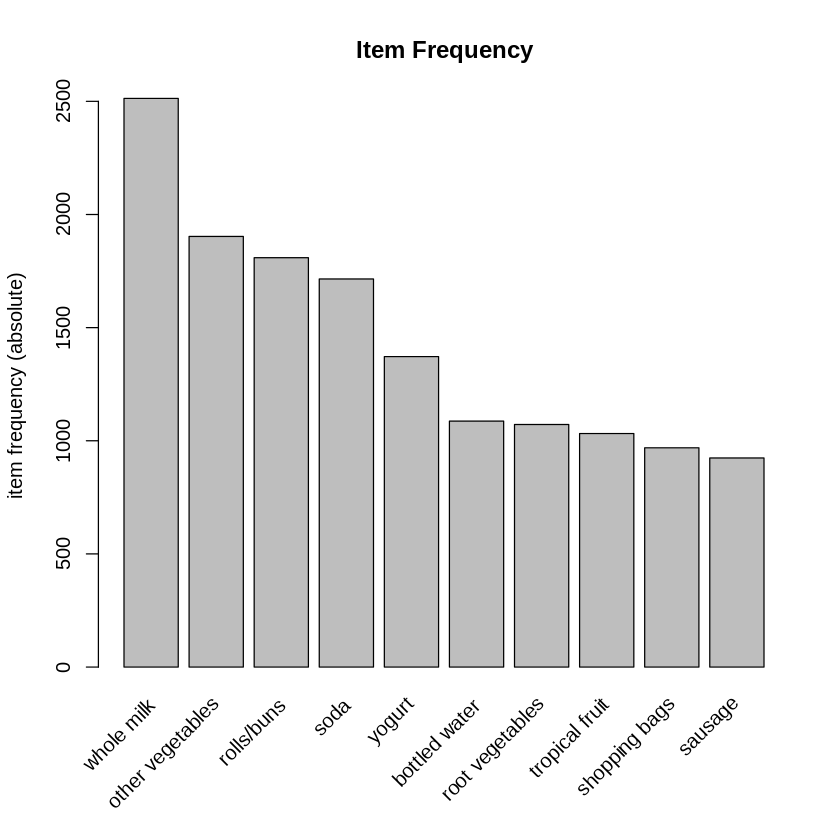

In [11]:
itemFrequencyPlot(Groceries,
                  topN=10, 
                  type="absolute", 
                  main="Item Frequency") #podemos graficar los items frecuentes

## ¿Cómo determinamos las reglas?

In [12]:
rules <- apriori(data = Groceries, #debe ser del tipo "transactions"
                 parameter = list(supp=0.01, conf = 0.08),
                )
rules

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
       0.08    0.1    1 none FALSE            TRUE       5    0.01      1
 maxlen target  ext
     10  rules TRUE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 98 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[169 item(s), 9835 transaction(s)] done [0.00s].
sorting and recoding items ... [88 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 2 3 4 done [0.00s].
writing ... [472 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


set of 472 rules 

In [13]:
length(rules)
inspect(rules)

[1] 472

      lhs                           rhs                        support confidence   coverage      lift count
[1]   {}                         => {bottled beer}          0.08052872 0.08052872 1.00000000 1.0000000   792
[2]   {}                         => {pastry}                0.08896797 0.08896797 1.00000000 1.0000000   875
[3]   {}                         => {citrus fruit}          0.08276563 0.08276563 1.00000000 1.0000000   814
[4]   {}                         => {shopping bags}         0.09852567 0.09852567 1.00000000 1.0000000   969
[5]   {}                         => {sausage}               0.09395018 0.09395018 1.00000000 1.0000000   924
[6]   {}                         => {bottled water}         0.11052364 0.11052364 1.00000000 1.0000000  1087
[7]   {}                         => {tropical fruit}        0.10493137 0.10493137 1.00000000 1.0000000  1032
[8]   {}                         => {root vegetables}       0.10899847 0.10899847 1.00000000 1.0000000  1072
[9]   {}           

In [14]:
## Y si queremos buscar con qué combinar un producto determinado, por ejemplo leche
rules <- apriori( data = Groceries, 
                  parameter =list (supp=0.05,conf = 0.10, minlen = 2),
                  #appearance = list(default="rhs", lhs ="whole milk"),
                  control = list (verbose=F)) 

class(rules)
rules

[1] "rules"
attr(,"package")
[1] "arules"

set of 6 rules 

In [15]:
inspect(rules)

    lhs                   rhs                support    confidence coverage 
[1] {yogurt}           => {whole milk}       0.05602440 0.4016035  0.1395018
[2] {whole milk}       => {yogurt}           0.05602440 0.2192598  0.2555160
[3] {rolls/buns}       => {whole milk}       0.05663447 0.3079049  0.1839349
[4] {whole milk}       => {rolls/buns}       0.05663447 0.2216474  0.2555160
[5] {other vegetables} => {whole milk}       0.07483477 0.3867578  0.1934926
[6] {whole milk}       => {other vegetables} 0.07483477 0.2928770  0.2555160
    lift     count
[1] 1.571735 551  
[2] 1.571735 551  
[3] 1.205032 557  
[4] 1.205032 557  
[5] 1.513634 736  
[6] 1.513634 736  


In [16]:
rules_conf <- sort(rules, 
                   by="lift",
                   decreasing=TRUE) # ordenando por confidence rules.

In [18]:

inspect(rules_conf)

    lhs                   rhs                support    confidence coverage 
[1] {yogurt}           => {whole milk}       0.05602440 0.4016035  0.1395018
[2] {whole milk}       => {yogurt}           0.05602440 0.2192598  0.2555160
[3] {other vegetables} => {whole milk}       0.07483477 0.3867578  0.1934926
[4] {whole milk}       => {other vegetables} 0.07483477 0.2928770  0.2555160
[5] {rolls/buns}       => {whole milk}       0.05663447 0.3079049  0.1839349
[6] {whole milk}       => {rolls/buns}       0.05663447 0.2216474  0.2555160
    lift     count
[1] 1.571735 551  
[2] 1.571735 551  
[3] 1.513634 736  
[4] 1.513634 736  
[5] 1.205032 557  
[6] 1.205032 557  


## Transformación a objetos de clase transaction





In [19]:
?transactions